## Fase 5: Análisis de datos


In [1]:
# imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import requests
import json
from bs4 import BeautifulSoup

import time

# from loadCredentials import loadCredentials
from funciones_scraping import get_languages

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# Cargamos el dataframe

df = pd.read_csv('../output/dataframe-limpio3939x55.csv', index_col=0)
df.shape

(3900, 55)

In [3]:
df.head()

,allies,bf (beta),c,c#,c++,clojure,coffeescript,collections,comments,crystal,dart,elixir,elm (beta),erlang (beta),f#,followers,following,fortran (beta),go,groovy (beta),haskell,honor,java,javascript,julia (beta),kotlin (beta),kumite,last seen,leaderboard position,lua (beta),member since,nasm (beta),nim (beta),objective-c (beta),ocaml (beta),php,powershell (beta),purescript (beta),python,r (beta),rank,ruby,rust,scala (beta),shell,solidity (beta),sql,swift,total completed kata,total languages trained,translations,typescript,username,github,linkedin
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,376.0,0.0,428.0,0.0,0.0,0.0,2017-02-01,0.0,0.0,2015-12-01,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,2.0,0.0,0.0,mr.tk,NaN,NaN
1,47.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,0.0,2017-05-01,0.0,0.0,2016-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,Caffeinatedbrew,https://github.com/Caffeinatedbrew,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,0.0,2089.0,0.0,5071.0,0.0,0.0,0.0,2018-08-01,0.0,0.0,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1.0,0.0,0.0,rscharfer,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7051.0,0.0,21.0,0.0,0.0,8.0,2018-12-01,318.0,0.0,2018-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20110.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,2.0,0.0,0.0,tommur,NaN,NaN
4,770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,770.0,0.0,0.0,0.0,0.0,2265.0,2.0,2801.0,0.0,0.0,1.0,2018-12-01,0.0,0.0,2017-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,3.0,0.0,0.0,caparezza,https://github.com/jakubpodolski,NaN


### 5.1 Correlación | heatmap

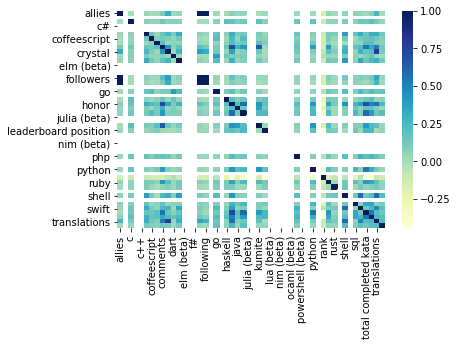

In [4]:
correlation = df.corr(method='pearson')
ax = sns.heatmap(correlation, cmap="YlGnBu")

In [5]:
# Se puede apreciar la alta correlación entre las features sociales: 
# followers, following, allies

correlation.loc['followers', 'allies'], correlation.loc['following', 'allies']

(0.9882399634066812, 0.9994050065889112)

In [6]:
# Podemos eliminar dos de las tres por la alta correlación. 
df.drop(columns=['followers', 'following'], inplace=True)

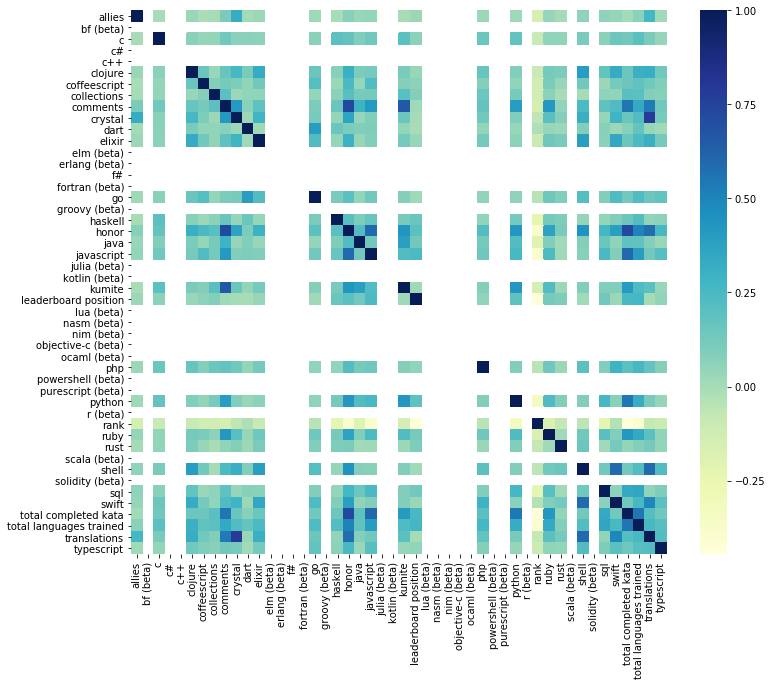

In [9]:
correlation = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(correlation, cmap="YlGnBu")

In [81]:
# hay muchas columnas que están a 0 todos sus valores (las que están en blanco en corr)

df['fortran (beta)'].value_counts()

0.0    3900
Name: fortran (beta), dtype: int64

In [82]:
df.dtypes

allies                     float64
bf (beta)                  float64
c                          float64
c#                         float64
c++                        float64
clojure                    float64
coffeescript               float64
collections                float64
comments                   float64
crystal                    float64
dart                       float64
elixir                     float64
elm (beta)                 float64
erlang (beta)              float64
f#                         float64
fortran (beta)             float64
go                         float64
groovy (beta)              float64
haskell                    float64
honor                      float64
java                       float64
javascript                 float64
julia (beta)               float64
kotlin (beta)              float64
kumite                     float64
last seen                   object
leaderboard position       float64
lua (beta)                 float64
member since        

In [83]:
df['member since'] = pd.to_datetime(df['member since'])
df['last seen'] = pd.to_datetime(df['last seen'])

In [84]:
# nos quedamos sólo con las columnas numéricas

# df_numeric = df.select_dtypes(include=['float', 'datetime64[ns]'])  
df_numeric = df.select_dtypes(include=['float'])  

In [85]:
df_numeric.dtypes

allies                     float64
bf (beta)                  float64
c                          float64
c#                         float64
c++                        float64
clojure                    float64
coffeescript               float64
collections                float64
comments                   float64
crystal                    float64
dart                       float64
elixir                     float64
elm (beta)                 float64
erlang (beta)              float64
f#                         float64
fortran (beta)             float64
go                         float64
groovy (beta)              float64
haskell                    float64
honor                      float64
java                       float64
javascript                 float64
julia (beta)               float64
kotlin (beta)              float64
kumite                     float64
leaderboard position       float64
lua (beta)                 float64
nasm (beta)                float64
nim (beta)          

### 5.2 D3

In [10]:
# languages = [lang for lang in get_languages() if lang in df.columns]
# languages

In [11]:
# {"name": "php", "size": 2},
def create_d3(): 
    idiomas = []
    languages = [lang for lang in get_languages() if lang in df.columns]
    for col in languages: 
        idiomas.append({'name': col, "size": int(df[col].sum())})
    res = {"name": "Lenguajes","children": [{"name": "Lenguajes","children": [{"name": "Lenguajes","children": idiomas}]}]}
    
    return json.dumps(res, ensure_ascii=False)

def save_d3_languages_json(lang_json, filename='../representacion_d3/lenguajes.json'): 
    with open(filename, 'w') as f: 
        f.write(lang_json)

In [13]:
save_d3_languages_json(create_d3())

### 5.3 Unsupervised Learning

In [68]:
from sklearn.cluster import KMeans

In [54]:
X = df_numeric

kmeans = KMeans(n_clusters=2)
cw_kmeans = kmeans.fit(X)